<a href="https://colab.research.google.com/github/icaroluis4/python-forecasts/blob/main/TheProphetBlazeCrash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação

#Importação

In [ ]:
from fbprophet import Prophet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import yfinance as yf
import pandas_datareader.data as web
#yf.pdr_override()

from sklearn.metrics import mean_squared_error

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20 , 10

#Criar um vetor de novas datas

In [ ]:
datas = pd.date_range( start = '2021-01-01' , end = '2021-04-10')
datas2 = pd.date_range( start = '2021-04-11' , end = '2021-05-30')

datas2.shape #Type date index

(50,)

In [ ]:
datas_df = pd.DataFrame(datas)

datas_df.columns = ['ds']

datas_df

,ds
0,2021-01-01
1,2021-01-02
2,2021-01-03
3,2021-01-04
4,2021-01-05
...,...
163,2021-06-13
164,2021-06-14
165,2021-06-15
166,2021-06-16


#Dados

In [ ]:
#ndex = [ 1 , 2 , 3 , 4 , 5 , 6 , 7 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 20] 
hist = [ 12
, 1.03
, 1.56
, 1.05
, 1.40
, 5.10
, 1.39
, 1.18
, 1.87
, 1.13
, 1.17
, 1.01
, 3.17
, 1.17
, 1.00
, 1.00
, 1.22
, 1.78
, 2.05
, 1.00
, 1.66
, 1.49
, 2.35
, 2.59
, 5.92
, 4.58
, 2.16
, 1.21
, 2.57
, 1.28
, 26.34
, 2.33
, 1.18
, 1.27
, 7.64
, 7.52
, 1.89
, 1.86
, 6.11
, 5.13
, 1.64
, 1.07
, 1.00
, 6.99
, 1.56
, 1.58
, 2.05
, 1.02
, 1.46
, 2.00
, 9.15
, 1.65
, 7.75
, 2.11
, 2.72
, 1.05
, 1.22
, 5.03
, 1.28
, 1.85
, 3.08
, 2.18
, 13.29
, 1.95
, 2.65
, 13.60
, 2.19
, 36.13
, 1.40
, 1.00
, 1.34
, 9.38
, 1.98
, 1.46
, 30.34
, 1.54
, 3.86
, 2.01
, 1.43
, 1.40
, 1.19
, 11.15
, 3.30
, 54.59
, 14.76
, 1.50
, 1.57
, 6.17
, 1.09
, 4.50
, 5.99
, 1.49
, 30.28
, 1.13
, 1.33
, 1.60
, 1.00
, 15.87
, 2.76
, 1.00
]
test = [  2.61
, 1.11
, 3.08
, 2.10
, 1.80
, 1.52
, 1.06
, 1.10
, 1.92
, 1.75
, 7.98
, 4.66
, 1.87
, 1.00
, 1.09
, 39.38
, 1.94
, 1.03
, 2.11
, 5.50
, 6.51
, 2.00
, 1.35
, 17 #171.72
, 1.01
, 4.93
, 2.58
, 3.36
, 1.95
, 1.00
, 11.58
, 1.00
, 2.53
, 2.95
, 3.05
, 1.47
, 1.22
, 1.56
, 1.45
, 2.30
, 1.49
, 1.20
, 2.56
, 3.06
, 7.30
, 1.43
 ,13.72 ,2.65 ,6.21 ,1.23]

print(len(hist) ,len(test))

100 50


In [ ]:
blaze_df = pd.DataFrame({  'ds' : datas , 'y' : hist}) #ds (datas) , y (cores)
test_df = pd.DataFrame({ 'ds': datas2 ,'y' : test})

blaze_df.head() 

,ds,y
0,2021-01-01,12.00
1,2021-01-02,1.03
2,2021-01-03,1.56
3,2021-01-04,1.05
4,2021-01-05,1.40


In [ ]:
test_df.head()

,ds,y
0,2021-04-11,2.61
1,2021-04-12,1.11
2,2021-04-13,3.08
3,2021-04-14,2.10
4,2021-04-15,1.80


#Isolando Close

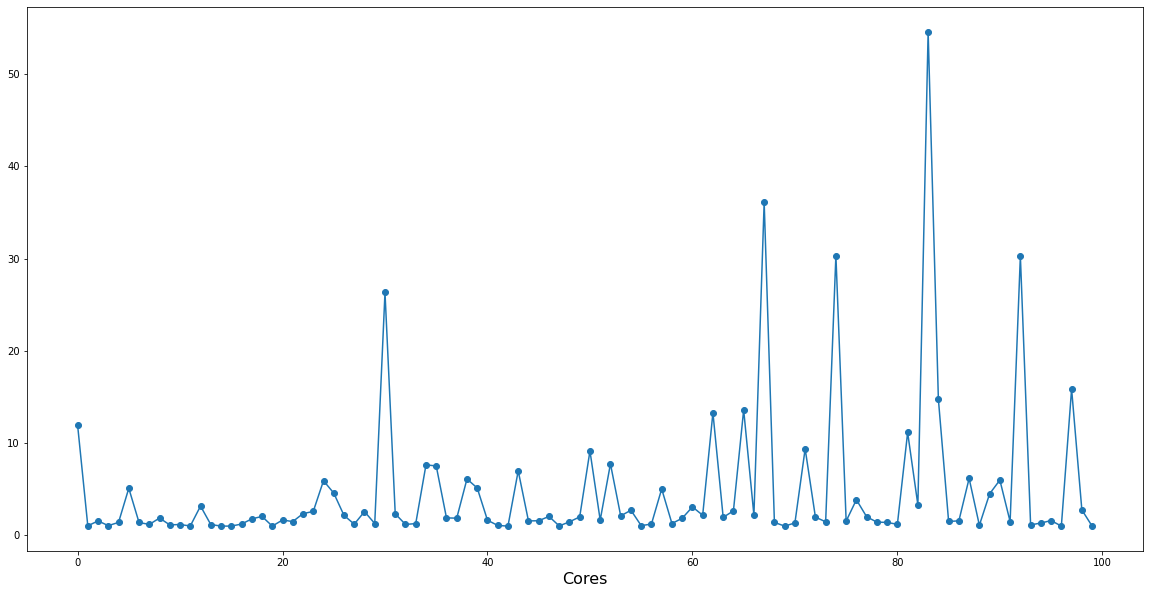

In [ ]:

plt.xlabel('Cores' , size = 16)
#plt.ylabel('Preços' , size = 16)
blaze_df['y'].plot(  marker = 'o')
plt.show()

#Resetando Index 'Date'

In [ ]:
blaze_df.reset_index('ndex' , inplace = True)

KeyError: ignored

In [ ]:
type(blaze_df)

pandas.core.frame.DataFrame

In [ ]:
type(test_df)

pandas.core.frame.DataFrame

In [ ]:
blaze_df.head()

,ds,y
0,2021-01-01,12.00
1,2021-01-02,1.03
2,2021-01-03,1.56
3,2021-01-04,1.05
4,2021-01-05,1.40


In [ ]:
blaze_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#Separando train , test

In [ ]:
blaze_df.shape , test_df.shape

((100, 2), (50, 2))

#Modelo

In [ ]:
model = Prophet()

model.fit(blaze_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Previsão

In [ ]:
prev = model.predict(pd.DataFrame(test_df['ds'])) #Sempre usar DataFrame no Prophet

In [ ]:
prev

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-04-11,7.803892,-2.815784,17.752999,7.803892,7.803892,-0.472683,-0.472683,-0.472683,-0.472683,-0.472683,-0.472683,0.0,0.0,0.0,7.331209
1,2021-04-12,7.862358,-3.280985,16.875723,7.862358,7.862358,-1.742530,-1.742530,-1.742530,-1.742530,-1.742530,-1.742530,0.0,0.0,0.0,6.119828
2,2021-04-13,7.920824,0.521454,21.099069,7.920824,7.920824,2.561918,2.561918,2.561918,2.561918,2.561918,2.561918,0.0,0.0,0.0,10.482742
3,2021-04-14,7.979290,-4.541783,15.485273,7.979290,7.979290,-2.559953,-2.559953,-2.559953,-2.559953,-2.559953,-2.559953,0.0,0.0,0.0,5.419337
4,2021-04-15,8.037755,1.650189,21.075694,8.037755,8.037756,3.047452,3.047452,3.047452,3.047452,3.047452,3.047452,0.0,0.0,0.0,11.085208
5,2021-04-16,8.096221,-3.413978,16.861819,8.096221,8.096221,-1.140677,-1.140677,-1.140677,-1.140677,-1.140677,-1.140677,0.0,0.0,0.0,6.955544
6,2021-04-17,8.154687,-1.566296,18.257747,8.154687,8.154687,0.306473,0.306473,0.306473,0.306473,0.306473,0.306473,0.0,0.0,0.0,8.461160
7,2021-04-18,8.213153,-2.354521,17.758258,8.213153,8.213153,-0.472683,-0.472683,-0.472683,-0.472683,-0.472683,-0.472683,0.0,0.0,0.0,7.740470
8,2021-04-19,8.271619,-3.479572,16.347884,8.271619,8.271619,-1.742530,-1.742530,-1.742530,-1.742530,-1.742530,-1.742530,0.0,0.0,0.0,6.529089
9,2021-04-20,8.330085,0.917432,20.900700,8.330085,8.330085,2.561918,2.561918,2.561918,2.561918,2.561918,2.561918,0.0,0.0,0.0,10.892003


In [ ]:
prev[['ds' , 'yhat' , 'yhat_lower' , 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-04-11,7.331209,-2.815784,17.752999
1,2021-04-12,6.119828,-3.280985,16.875723
2,2021-04-13,10.482742,0.521454,21.099069
3,2021-04-14,5.419337,-4.541783,15.485273
4,2021-04-15,11.085208,1.650189,21.075694
5,2021-04-16,6.955544,-3.413978,16.861819
6,2021-04-17,8.461160,-1.566296,18.257747
7,2021-04-18,7.740470,-2.354521,17.758258
8,2021-04-19,6.529089,-3.479572,16.347884
9,2021-04-20,10.892003,0.917432,20.900700


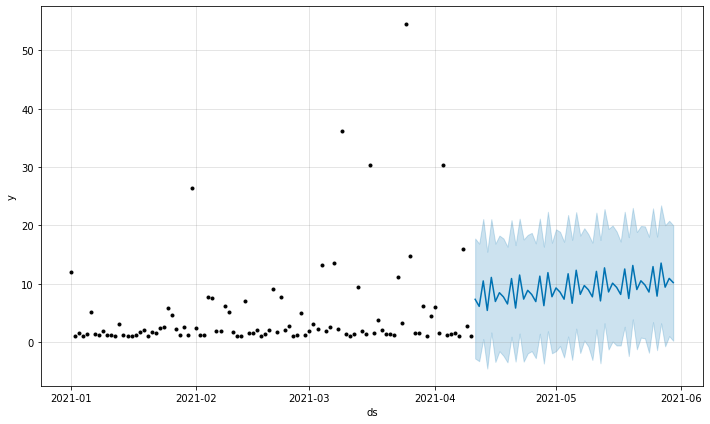

In [ ]:
model.plot(prev)
plt.show()

In [ ]:
y_prev = prev['yhat'].values
y_true = test_df['y'].values

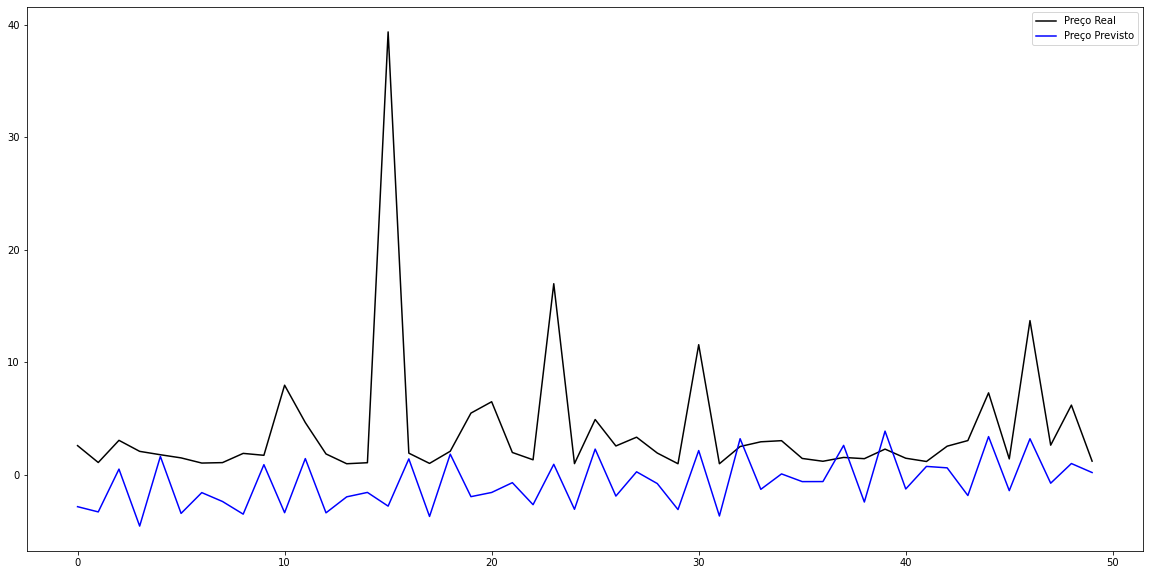

In [ ]:
plt.plot(y_true , color = 'black' , label = 'Preço Real')
plt.plot(prev['yhat_lower'] , color = 'blue' , label = 'Preço Previsto')
plt.legend()
plt.show()

In [ ]:
mean_squared_error(y_true , y_prev)

577.8183444681665

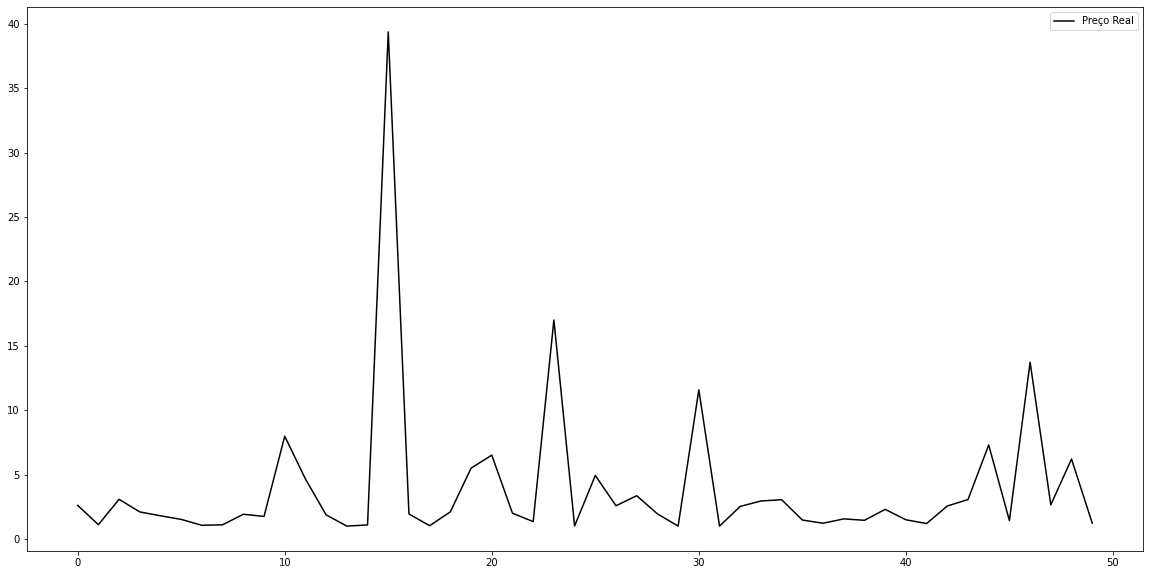

In [ ]:
plt.plot(y_true , color = 'black' , label = 'Preço Real')
plt.legend()
plt.show()

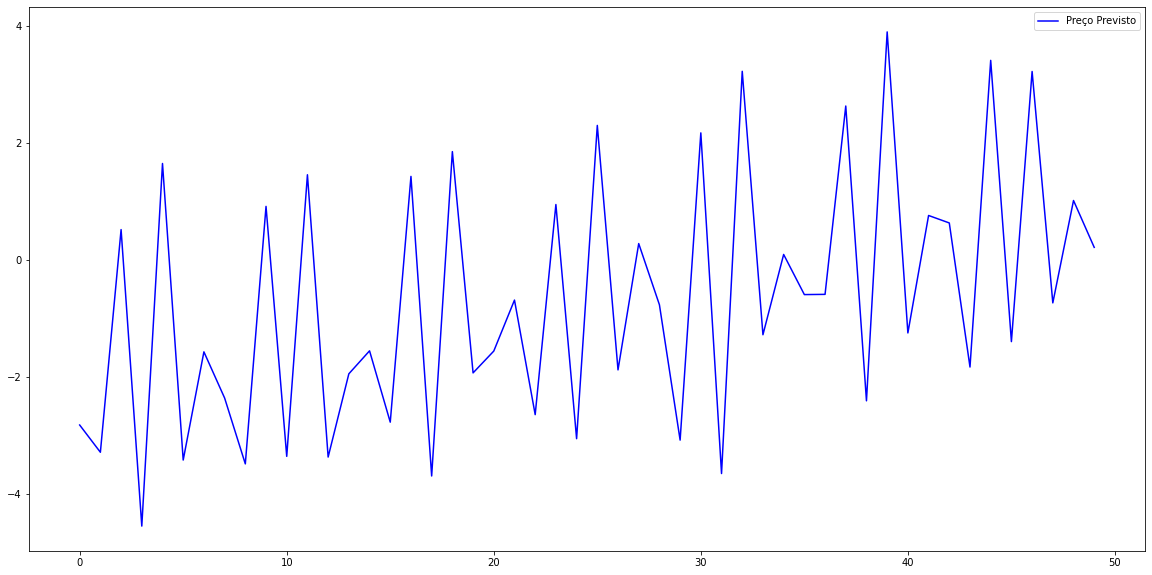

In [ ]:
plt.plot(prev['yhat_lower'] , color = 'blue' , label = 'Preço Previsto')
plt.legend()
plt.show()

#Tentando achar os maiores que 0.0

In [ ]:
y_maior = prev['yhat_lower'].values

In [ ]:
y_maior_zero = []

for x in y_maior:
    if(x > 1.10):
      y_maior_zero.append(x)
    else:
      y_maior_zero.append(1.0)

print(y_maior_zero)


[1.0, 1.0, 1.0, 1.0, 1.6501890360938087, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.4577479519777958, 1.0, 1.0, 1.0, 1.0, 1.4296291872834888, 1.0, 1.8528838450671599, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.300357123117932, 1.0, 1.0, 1.0, 1.0, 2.1728038898055275, 1.0, 3.2241243924948066, 1.0, 1.0, 1.0, 1.0, 2.6314782298186183, 1.0, 3.897096169101613, 1.0, 1.0, 1.0, 1.0, 3.4110380576169024, 1.0, 3.2211168047493612, 1.0, 1.0, 1.0]


In [ ]:
y_sete = test_df['y'].values

In [ ]:
y_maior_sete = []

for x in y_sete:
    if(x > 7.0):
      y_maior_sete.append(7.0)
    else:
      y_maior_sete.append(x)

print(y_maior_sete)

[2.61, 1.11, 3.08, 2.1, 1.8, 1.52, 1.06, 1.1, 1.92, 1.75, 7.0, 4.66, 1.87, 1.0, 1.09, 7.0, 1.94, 1.03, 2.11, 5.5, 6.51, 2.0, 1.35, 7.0, 1.01, 4.93, 2.58, 3.36, 1.95, 1.0, 7.0, 1.0, 2.53, 2.95, 3.05, 1.47, 1.22, 1.56, 1.45, 2.3, 1.49, 1.2, 2.56, 3.06, 7.0, 1.43, 7.0, 2.65, 6.21, 1.23]


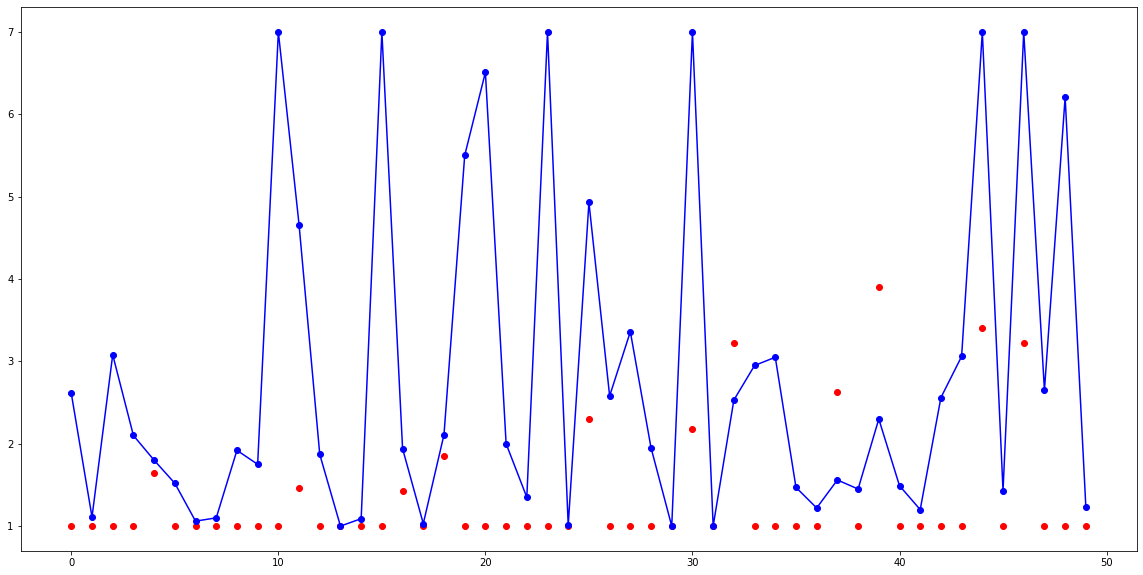

In [ ]:
plt.plot( y_maior_zero , 'ro' )
plt.plot(y_maior_sete , marker = 'o' , color = 'blue')
plt.show()